# Purpose
The goal of this notebook is to solve a regression problem without changing it into a classification problem. 

My previous attempt using the red_wine_quality_predictor turned into a binary classification problem. As such, I would like to practice and demonstrate my ability to solve regression problems without turning them into classification problem. 

# 6 Key steps 

We will follow and adapt the 6 key steps of Data analysis to this project.

6 Key steps: 

1) Ask 
- Define what the project would look like 
- Define what would qualify as successful result

2) Prepare 
- Build a timeline and determine how much time is needed
- Determine what data is needed to achieve a successful result

3) Process
- Collect, store, manage and protect the data.
- Processed the data by cleaning it to make sure it was complete, correct, relevant, and free of errors and outliers.

4) Analyze
- Experiment with different models and hyperparameters to meet criterias of success 
- Analyze data

5) Share / Visualize 
- Process and visualize data to share / make meaningful deductions from 

6) Act
- Determine how to implement changes and take actions based on the findings

# 1) Ask 
---

## Define what the project would look like 
* The goal of this notebook is to solve a regression problem without changing it into a classification problem 
* Therefore the goal will be utilizing the features( `longitude`,	`latitude`,	`housing_median_age`, `total_rooms`,	`total_bedrooms`, `population`, `households`, `median_income`) in the `california_housing` dataset, accuracrately predict the `median_house_value`

* A possible variation to experiment with is using `longitude`,	`latitude`,	`housing_median_age`, `total_rooms`,	`total_bedrooms`, `population`, `households`,  and `median_house_value` to determine what `median_income` would be needed to live there.



## Define what would qualify as a successful result
* We will aim for an accuracy of **>95%**

# 2) Prepare 
---
## Build a timeline and determine how much time is needed
* The estimated timeline will be a working week (5 day) sprint 

## Determine what data is needed to achieve a successful result
* We will be utilzing the sample data from google collab which has been downloaded and added to github : https://github.com/Kirlewn/Machine-Learning-Projects/tree/main/Data/california_housing_data 

* A description of the dataset can be found on kaggle at : https://www.kaggle.com/datasets/camnugent/california-housing-prices


In [2]:
# import standard expected libraries
import pandas as pd
import numpy as np 
import tensorflow as tf
import sklearn as sk 
import matplotlib.pyplot as plt
import seaborn as sns 

# 3) Process
---


##  Collect data

In [3]:
# the data is already pre-split into train and test so let's begin with importing the train data
data = pd.read_csv("https://raw.githubusercontent.com/Kirlewn/Machine-Learning-Projects/main/Data/california_housing_data/housing.csv")

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Exploration
Determine if there are any unusuable or strange data. 
This includes outliers, missing values, mismatched data types (an column with ints having a string input), etc. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From kaggle we get this description of each column: 
1. **longitude**: A measure of how far west a house is; a higher value is farther west

2. **latitude**: A measure of how far north a house is; a higher value is farther north
3. **housingMedianAge**: Median age of a house within a block; a lower number is a newer building
4. **totalRooms**: Total number of rooms within a block
5. **totalBedrooms**: Total number of bedrooms within a block
6. **population**: Total number of people residing within a block
7. **households**: Total number of households, a group of people residing within a home unit, for a block
8. **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. **medianHouseValue**: Median house value for households within a block (measured in US Dollars)
10. **oceanProximity**: Location of the house w.r.t ocean/sea

As we can see from `data.head()` and `data.info()` we will need to do something about `ocean_proximity` as that feature is of a different data type than the others. 



In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


It appears we may have missing data as the count for the columns are not consistent across all columns. Namely, the `total_bedrooms` column seems to be less than the rest

In [6]:
data[data.isnull().any(axis=1)] # any missing data in columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


Now that we know `total_bedrooms` is missing some entries we can either fill the entries (we could use averages or we could train a predictor and use those predictions as the missing values) or we could drop the missing rows. 

Since the other columns in the missing data rows appear valid, let's fill the missing values.

From what we can see from the `data.describe()` many of the columns have high standard deviation. we will need to address those before splitting into train test

### Data Visualization 
Let's plot some of our columns to familiarize ourself with the data

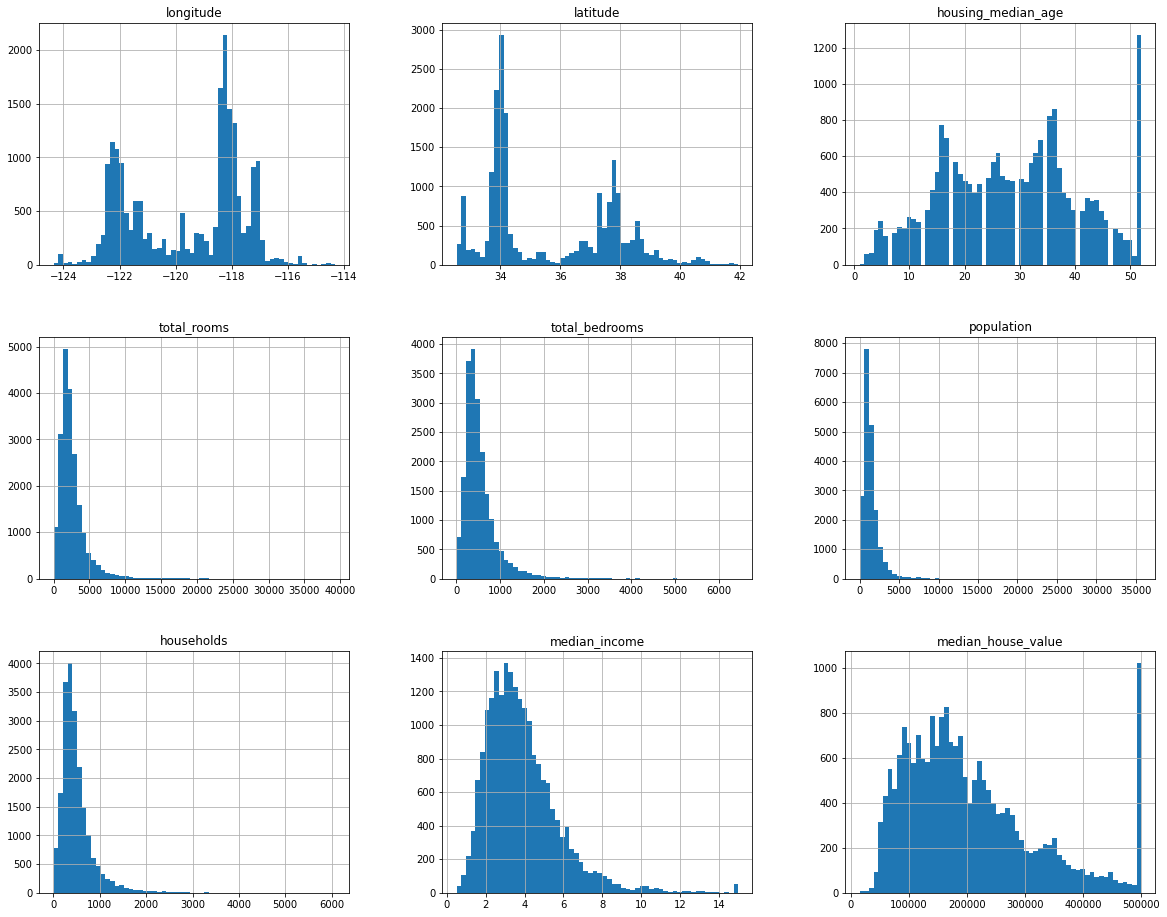

In [7]:
data.hist(bins=60, figsize=(20,16));plt.show();

Most of the data seems to have fairly normal distributions, but lets take a close look at `median_house_age` as it has an unusual spike near it maximum value that appears to correlate to the `median_house_value`.

Many of the features also appear to have significant outliers.

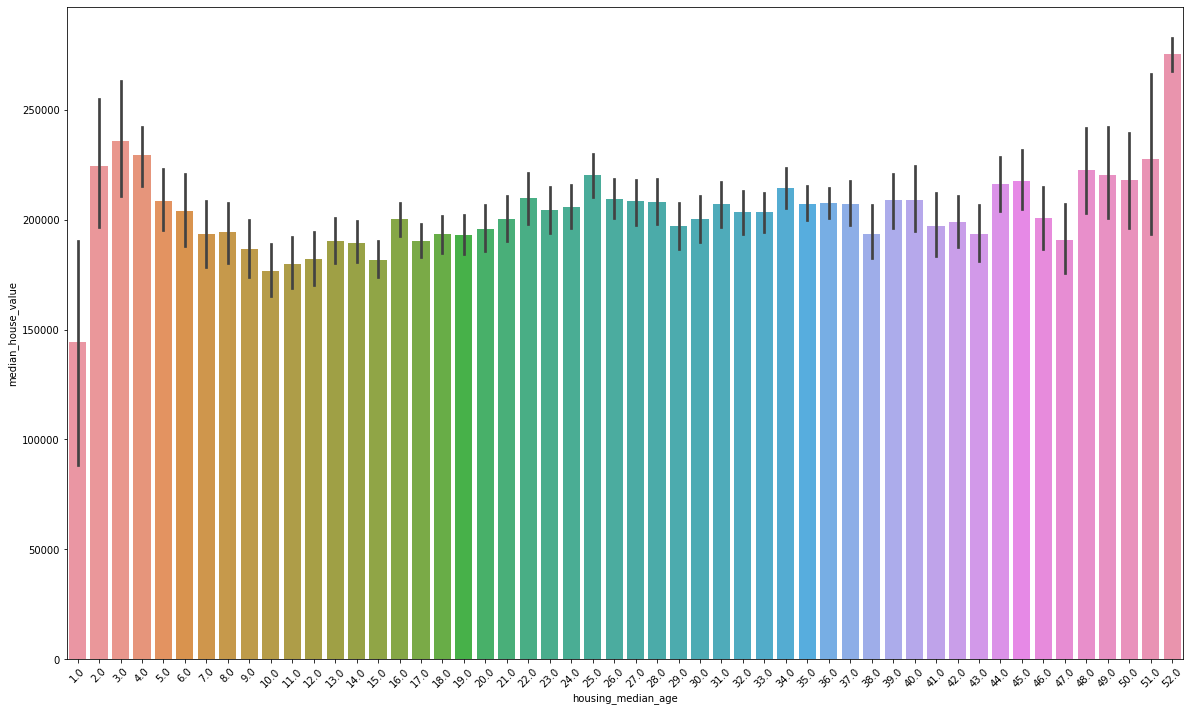

In [8]:
# Let's visualize housing_median_age vs median_house_value
fig = plt.figure(figsize = (20,12))
sns.barplot(x = 'housing_median_age', y = 'median_house_value', data = data);
plt.xticks(rotation = 45);

It appears newer homes and much older homes are valued the highest. 

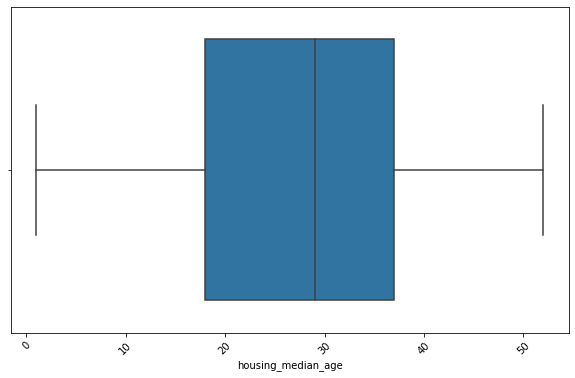

In [9]:
# let's visualize any outliers
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'housing_median_age', data = data);
plt.xticks(rotation = 45);

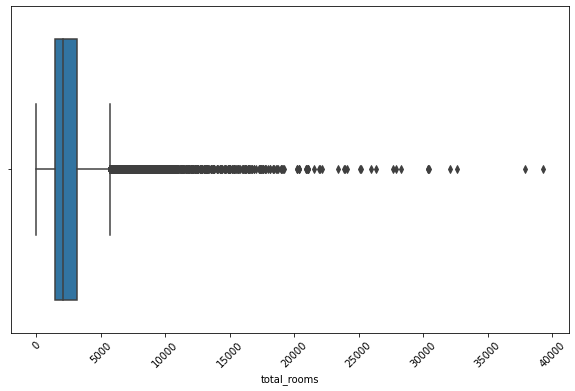

In [10]:
# let's visualize any outliers
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'total_rooms', data = data);
plt.xticks(rotation = 45);

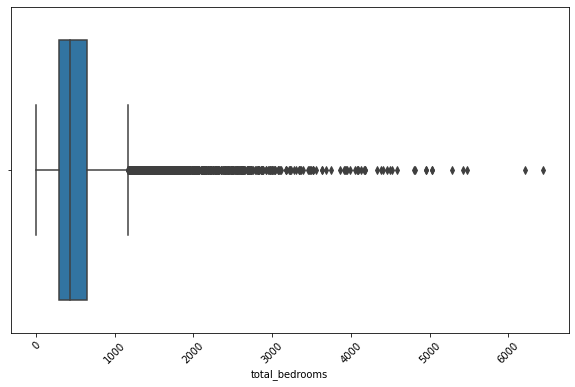

In [11]:
# let's visualize any outliers
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'total_bedrooms', data = data);
plt.xticks(rotation = 45);

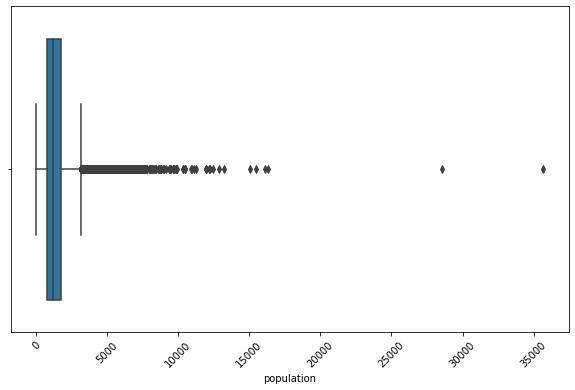

In [12]:
# let's visualize any outliers
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'population', data = data);
plt.xticks(rotation = 45);

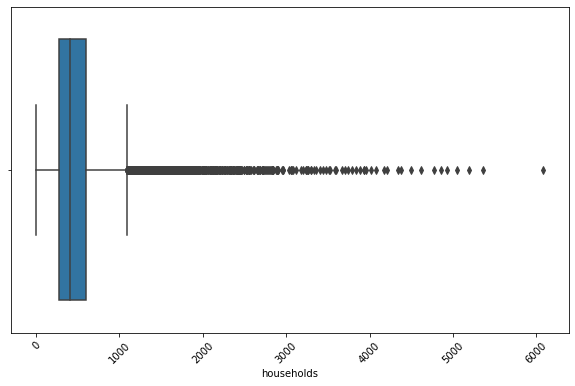

In [13]:
# let's visualize any outliers
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'households', data = data);
plt.xticks(rotation = 45);

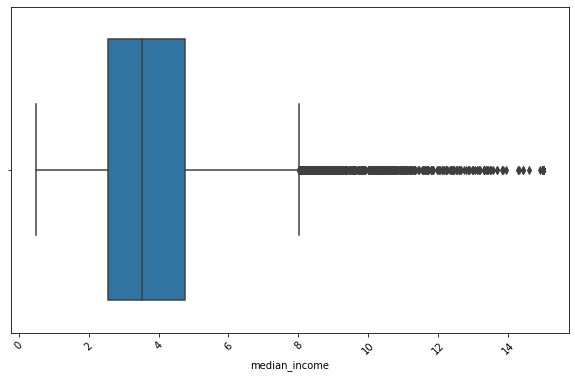

In [14]:
# let's visualize any outliers
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'median_income', data = data);
plt.xticks(rotation = 45);

Let's also take a look at our object data type feature `ocean_proximity`

In [15]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

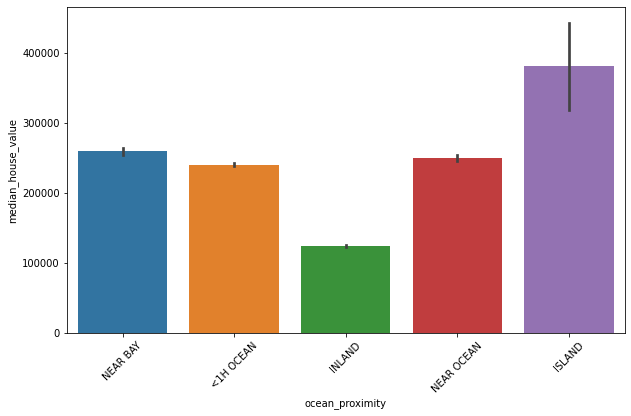

In [16]:
# let's visualize any outliers
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'ocean_proximity', y = data.median_house_value ,data = data);
plt.xticks(rotation = 45);

## Preprocess

Processed the data by cleaning it to make sure it was complete, correct, relevant, and free of errors and outliers.

Seems we have our work cut out for us. 
Let's create a list of tasks / problems we will need to solve. 

1. `total_bedrooms` has missing data that needs to be filled 
2. `housing_median_age`, `total_rooms`,	`total_bedrooms`, `population`,  and `households` have very high std, we will need to normalize our data
3. `ocean_proximity` is an object datatype which we will need to either *one_hot_encode* ,  *label_encode*   or manipulate in such a way that it can be utilized in our data 

### Fill or drop missing data

`total_bedrooms` has missing data that needs to be filled or dropped

Let's check the how "important" the `total_bedrooms` feature is 
we can do this a few ways:

1. **Correlation Matrix** : a correlation matrix is useful for quickly summarizing a large dataset by visualizing relationships between features. Generally, features that score too high or too low should be dropped as they may skew a model's learning. 

2. **Feature Importance Coefficient** : we can use sklearn and fit a simple model to make use of the `model.coef_` attribute. Essentially this attribute outputs the weights the model has placed on each feature which can signify how important the model thinks each feature is.

3. **Permutation Importance** : Permutation Importance defines the process of performing multing model fittings while randomly shuffling or dropping a feature and recording the model's score to determine how heavily the model relies on any particular feature

4. **PCA** : PCA aims to reduce the dimensions of the problem space by defining the covariance between the coefficients and selecting a number based on importance. 

Many of these feature selections method do take into effect after having fit a model to begin with. So let's first try a correlation matrix which does not require a model, then later when can test options `2` and `3` to see the presumed importance.   

#### Correlation Matrix

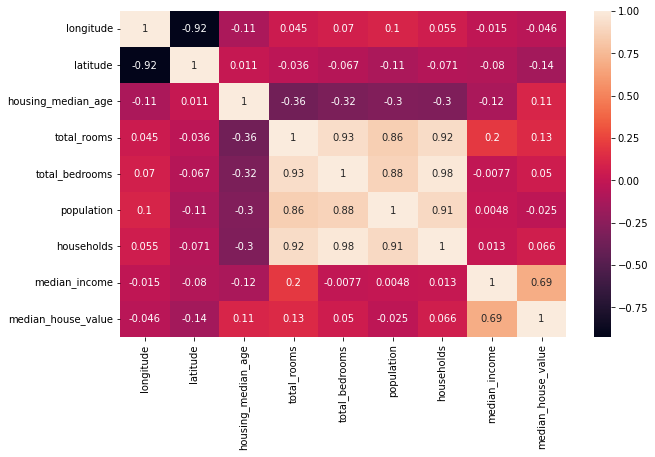

In [18]:
cor_mat = data.corr()

plt.figure(figsize = (10,6))
sns.heatmap(cor_mat, annot = True);

From the correlation matrix it appears that the most important feature may be `median_income` as it is heavily correlated to our label `median_house_value`. 

Ranking based on the matrix shows our top 3 features being 
1. median_income
2. households
3. total_bedrooms

Keep in mind that this is based on the raw data which may not be the most accurate. 

As the `total_bedrooms` appear to be important, I would prefer to go the safer route of filling the missing values with the average. The reason for this over filling the missing values with a model based prediction is: without first removing outliers it is possible that training a model on the skewed data could create misleading datapoints which when inputted into the dataset could further propogate those errors into the final prediction.  

In [21]:
data['total_bedrooms'].median()

435.0

Filling and dropping are both viable options here as the number of missing entries is quite low, account for only 1% of the total dataset. However, as we have not yet decided if we are dropping or scaling outliers, let us keep the rows and fill the missing values. 

In [29]:
data.total_bedrooms.count()

20433

In [30]:
data.median_house_value.count()

20640

In [25]:
num_missing = 20640 - 20433 
num_missing

207

In [28]:
perc_missing = num_missing / 20640
perc_missing *100

1.002906976744186

#### Filling missing data

In [31]:
data["total_bedrooms"] = data["total_bedrooms"].replace(np.NaN, data["total_bedrooms"].median())
data['total_bedrooms']

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

As we can see Length is 20640 which is the length of our complete dataset but let's just check to make sure

In [32]:
data[data.isnull().any(axis=1)] # any missing data in columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


### Manipulate outliers 
`housing_median_age`, `total_rooms`,	`total_bedrooms`, `population`,  and `households` have very high std, we will need to normalize our data

Let's revisualze the describe to remind ourselves of the data

In [33]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Let's explore two options for scaling data. For both we will use sklearn. 
1. StandardScaler


```
value = (value – mean) / stdev
```

2. RobustScaler
Relies more heavily on IQR and median. This sets 0 to the median and divides by IQR


```
value = (value – median) / (Q3 – Q1)
```



 Inter Quartile Range(IQR) is the box portion of the box plot. The left edge of the box is known as Q1 or the 25th percentile and the right edge of the box is Q3 or the 75 percentile. The highest value is Q4 also known as the upper fence or upper whisker, this is indicated by the right line outside the box. Similarly, Q2 is the lower fence or lower whisker and is the left line outside the box. Everything else is an outlier. 



#### Standard Scalar

In [36]:
data_non_ocean = data.copy()
data_non_ocean = data_non_ocean.drop('ocean_proximity',axis =1 )
data_non_ocean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc_data = sc.fit_transform(data_non_ocean)
sc_data

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

#### Robust Scalar

In [38]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

# calculate median and IQR  
rs.fit(data_non_ocean)

# scale all data points using median and IQR
rs_data = rs.transform(data_non_ocean)
rs_data

array([[-0.98680739,  0.95767196,  0.63157895, ..., -0.87076923,
         2.1975824 ,  1.88044789],
       [-0.98416887,  0.95238095, -0.42105263, ...,  2.24307692,
         2.18666422,  1.23204134],
       [-0.98944591,  0.94973545,  1.21052632, ..., -0.71384615,
         1.70773218,  1.18794143],
       ...,
       [-0.72031662,  1.36772487, -0.63157895, ...,  0.07384615,
        -0.84170929, -0.60223945],
       [-0.74670185,  1.36772487, -0.57894737, ..., -0.18461538,
        -0.76500677, -0.6546081 ],
       [-0.72559367,  1.35185185, -0.68421053, ...,  0.37230769,
        -0.525816  , -0.62222222]])

In [42]:
# dataframe with both standard and robust scaled values
scaled_values = pd.DataFrame({
    'Standard': sc_data.reshape(-1),
    'Robust': rs_data.reshape(-1)
})
scaled_values.describe()

,Standard,Robust
count,1.857600e+05,185760.000000
mean,-1.063672e-15,0.172092
std,1.000003e+00,0.984301
min,-2.385992e+00,-1.546174
25%,-6.891058e-01,-0.407220
50%,-1.998029e-01,0.000000
75%,5.788441e-01,0.528520
max,3.025033e+01,36.797441


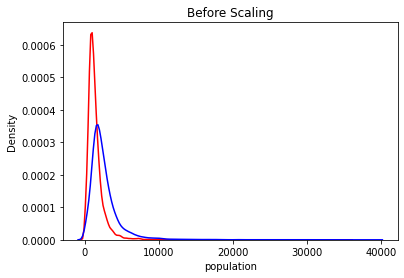

In [65]:
sns.kdeplot(data_non_ocean['population'], color ='r')
sns.kdeplot(data_non_ocean['total_rooms'], color ='b').set(title = 'Before Scaling');

In [58]:
sc_data_df = pd.DataFrame(sc_data, columns = ['longitude', 'latitude',	'housing_median_age',	'total_rooms', 'total_bedrooms',	'population',	'households'	,'median_income', 'median_house_value'])
sc_data_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900


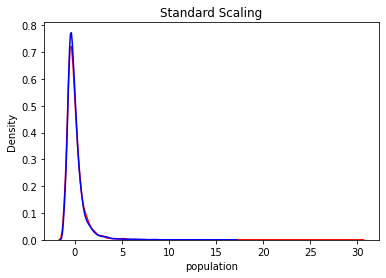

In [66]:
sns.kdeplot(sc_data_df['population'], color ='r')
sns.kdeplot(sc_data_df['total_rooms'], color ='b').set(title = 'Standard Scaling');

In [59]:
rs_data_df = pd.DataFrame(rs_data, columns = ['longitude', 'latitude',	'housing_median_age',	'total_rooms', 'total_bedrooms',	'population',	'households'	,'median_income', 'median_house_value'])
rs_data_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-0.986807,0.957672,0.631579,-0.733422,-0.883755,-0.899787,-0.870769,2.197582,1.880448
1,-0.984169,0.952381,-0.421053,2.924276,1.937906,1.316631,2.243077,2.186664,1.232041
2,-0.989446,0.949735,1.210526,-0.388178,-0.707581,-0.714286,-0.713846,1.707732,1.187941
3,-0.992084,0.949735,1.210526,-0.501691,-0.577617,-0.648188,-0.584615,0.967177,1.113523
4,-0.992084,0.949735,1.210526,-0.294074,-0.447653,-0.640725,-0.461538,0.142854,1.119724


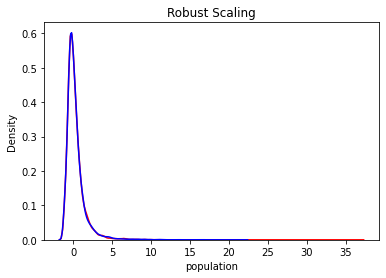

In [67]:
sns.kdeplot(rs_data_df['population'], color ='r')
sns.kdeplot(rs_data_df['total_rooms'], color ='b').set(title = 'Robust Scaling');

Standard scalar using the mean value and stdev means that it is much more susceptible to outliers skewing the data points. 

As such, we will be moving forward with the Robust scaling

### Ocean Proximity encoding

`ocean_proximity` is an object datatype which we will need to either one_hot_encode , label_encode or manipulate in such a way that it can be utilized in our data. 

One-hot encoding represents the data as binary vectors and generally creates more columns than label encoding which can increase the dimensionality of the dataset. 

Label encoding represents the data as numbers and generally does not increase the number of dimensions. 

Label encoding is better if there are less classes as there will only be one column with the different numbers. One-hot encoding is better if there are more classes as each class will be represented as 0 or 1 which has a lower chance of confusing the model however it will increase the dimensionality. 

In [68]:
ocean_data = data.ocean_proximity.copy()
ocean_data

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

#### One-hot

##### Dummy Encoding

Dummy encoding is a form of one-hot encoding except instead of going  to n-1 classes it goes to n-2 classes and it represents the n-1 class as having all 0's. 

In [70]:
dummy_encoding_df = pd.get_dummies(ocean_data)
dummy_encoding_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


#### Label Encoding

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded = ocean_data.copy()
label_encoded_df = le.fit_transform(label_encoded)
label_encoded_df 

array([3, 3, 3, ..., 1, 1, 1])

Let's move forward with the dummy encoding method

### Recap

In this section we had 3 main objectives. 
1. Fill missing data
2. Manipulate our data to address our outliers
3. Merge our ocean_proximity feature into the dataset by resolving the datatype conflict. 

Let's review how we accomplished these objectives and review the new dataset

1. Fill missing data 
 - Our missing data was isolated in the `total_bedrooms` column and accounted for approximately 1% of the data in that column. 
 - While it was a valid option to drop rows containing the missing data, we chose to fill it.
 - We identified 3 ways to fill the missing data: training a model and having it input the missing values, filling with the mean, or filling with the median. 
 - We chose to fill with the median 
 

In [88]:
data['total_bedrooms']

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [89]:
data[data.isnull().any(axis=1)] # any missing data in columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


2. Manipulate our data to address outliers
 - From our data exploration we identified multiple columns having high stdev and outliers
 - To scale our data we explored two methods, Standard Scalar and Robust Scalar 
 - While both were viable options, we chose Robust Scalar as it utilizes the median and the IQR which allows it to be less susceptible to outliers
 

In [90]:
rs_data_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-0.986807,0.957672,0.631579,-0.733422,-0.883755,-0.899787,-0.870769,2.197582,1.880448
1,-0.984169,0.952381,-0.421053,2.924276,1.937906,1.316631,2.243077,2.186664,1.232041
2,-0.989446,0.949735,1.210526,-0.388178,-0.707581,-0.714286,-0.713846,1.707732,1.187941
3,-0.992084,0.949735,1.210526,-0.501691,-0.577617,-0.648188,-0.584615,0.967177,1.113523
4,-0.992084,0.949735,1.210526,-0.294074,-0.447653,-0.640725,-0.461538,0.142854,1.119724


In [91]:
rs_data_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,20640.000000
mean,-0.284882,0.362926,-0.018974,0.299228,0.294119,0.276628,0.278584,1.540799e-01,0.187120
std,0.528636,0.565067,0.662398,1.283114,1.211240,1.207316,1.176399,8.715378e-01,0.795146
min,-1.546174,-0.455026,-1.473684,-1.249816,-1.253430,-1.239872,-1.255385,-1.392252e+00,-1.134891
25%,-0.873351,-0.087302,-0.578947,-0.399500,-0.398556,-0.404051,-0.396923,-4.456270e-01,-0.414126
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.018608e-16,0.000000
75%,0.126649,0.912698,0.421053,0.600500,0.601444,0.595949,0.603077,5.543730e-01,0.585874
max,1.102902,2.034392,1.210526,21.875018,17.357401,36.797441,17.455385,5.259674e+00,2.207070


3. Integrate the ocean_proximity feature into our dataset
 - Reviewing the data, we noticed the ocean_proximity column contained strings which would cause problems for any model we use as there would be irregular data 
 - To address this we needed a way to turn words, classes or categories into a numerical representation 
 - We chose to utilizing dummy encoding, a type of one-hot encoding, after comparing the label encoding and one-hot encoding methods. 
 

In [93]:
dummy_encoding_df.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


### Merge Datasets

Now let's combine our dummy_encoding_df with our rs_data_df to create our final dataset

In [102]:
df = pd.concat([rs_data_df, dummy_encoding_df], axis = 1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-0.986807,0.957672,0.631579,-0.733422,-0.883755,-0.899787,-0.870769,2.197582,1.880448,0,0,0,1,0
1,-0.984169,0.952381,-0.421053,2.924276,1.937906,1.316631,2.243077,2.186664,1.232041,0,0,0,1,0
2,-0.989446,0.949735,1.210526,-0.388178,-0.707581,-0.714286,-0.713846,1.707732,1.187941,0,0,0,1,0
3,-0.992084,0.949735,1.210526,-0.501691,-0.577617,-0.648188,-0.584615,0.967177,1.113523,0,0,0,1,0
4,-0.992084,0.949735,1.210526,-0.294074,-0.447653,-0.640725,-0.461538,0.142854,1.119724,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.686016,1.380952,-0.210526,-0.271725,-0.176173,-0.342217,-0.243077,-0.905796,-0.700086,0,1,0,0,0
20636,-0.717678,1.383598,-0.578947,-0.841053,-0.823105,-0.863539,-0.907692,-0.448655,-0.706977,0,1,0,0,0
20637,-0.720317,1.367725,-0.631579,0.074695,0.144404,-0.169510,0.073846,-0.841709,-0.602239,0,1,0,0,0
20638,-0.746702,1.367725,-0.578947,-0.157036,-0.075090,-0.453092,-0.184615,-0.765007,-0.654608,0,1,0,0,0


# 4) Analyze
---

Experiment with different models and hyperparameters to meet criterias of success. 

Model Experiments

* Linear Regression
* SGD Regressor 
* Lasso 
* XGBRegressor

Analyze data